In [1]:
%matplotlib inline

from pathlib import Path 


import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
import matplotlib.colors as mcolors
import matplotlib.cm as mcm

from mpl_toolkits.axisartist.axislines import AxesZero


import papercolors as pc
from papercolors import colordict as pcd

paper_path = Path('../figures/tex/')

fs={'normal': 10, 'small':9, 'footnote':8, 'script':7, 'tiny':5, 'heading':12}


In [2]:
packages = "\n".join( 
    [r"\usepackage{inputenc}", 
     r"\usepackage[T1]{fontenc}",
     r"\usepackage{cmbright}",
     r'\usepackage{{amsmath}}',
     r'\usepackage{{amssymb}}',
     r'\usepackage{{latexsym}}',
    ])
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = packages
mpl.rc('font', family='serif', serif="Times New Roman")
mpl.rcParams['figure.dpi']=200
mpl.rc("pgf", texsystem = "pdflatex", preamble = packages)

In [4]:
x = np.array([[1,0,0], [0, 1, 0], [0, 0, 1]])
y = np.array([[0, -1, -1], [-1, 0, -1], [-1, -1, 0]])

In [5]:
cmap = mcolors.ListedColormap(['orange', 'white', 'purple'])
norm = mcolors.Normalize(vmin=-1, vmax=1)

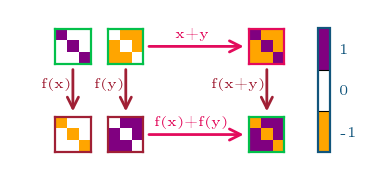

In [6]:
fig, ax = plt.subplots(figsize=(2, 1))
ax.set(xticks=[], yticks=[], xlim=(0,2), ylim=(0,1), aspect='equal')

w = h = .25
left = 0+w*.25
right = 1-w
top = 1-w*1.25
bottom = 0+w*.25

boxes = [('x', (left, top)),('y', (left+ w*.75, top)), ('x+y', (right, top)), ('fx', (left, bottom)),('fy', (left+ w*.75, bottom)) , ('fx+y', (right, bottom))]
axd = {}
for (d, (xi, yi)) in boxes:
    axd[d] = ax.inset_axes([xi, yi, w, h])
    axd[d].set(xticks=[], yticks=[], aspect='equal')
    
# (x,y), # (f(x), f(y)
for axn, d in [('x', x), ('y', y)]:
    axd[axn].imshow(d, cmap=cmap, norm=norm)
    axd[axn].spines[:].set_edgecolor(pcd['section'])
    axd[f"f{axn}"].imshow(d*-1, cmap=cmap, norm=norm)
    axd[f"f{axn}"].spines[:].set_edgecolor(pcd['action'])

for axn, d, ec in [('x+y', x+y, 'fiber'), ('fx+y', (x+y)*-1, 'section')]:
    im = axd[axn].imshow(d, cmap=cmap, norm=norm)
    axd[axn].spines[:].set_edgecolor(pcd[ec])

# arrows: annotate: tail, head, tail=text, xy=head
# f(x), f(y)
for l in ['x', 'y', 'x+y']:
    f = ax.annotate("", (.5, 1), (.5,0), xycoords= axd[f'f{l}'], textcoords= axd[l], arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['action'])) 
    ax.annotate(f"f({l})", xytext=(.4, .55), xy=(0,0), textcoords=f, ha='right', va='center', fontsize=fs['tiny'], color=pcd['action'], rotation=0)

for (s, t, lab) in [('y', 'x+y', 'x+y'), ('fy', 'fx+y', 'f(x)+f(y)')]:
    f = ax.annotate("", (0, .5), (1, .5), xycoords= axd[t], textcoords= axd[s], arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['fiber']))
    ax.annotate(lab, xytext=(.5, 1), xy=(0,0), textcoords=f, ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['fiber'], rotation=0)
ax.spines[:].set_edgecolor('white')
cb = fig.colorbar(mcm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, fraction=.04, aspect=10,  spacing='uniform', drawedges=True)
cb.set_ticks([-1+(2/6), 0, 1-(2/6)])
cb.set_ticklabels([-1, 0, 1], fontsize=fs['tiny'], color=pcd['artist'],)
cb.ax.spines[:].set_edgecolor(pcd['artist'])
cb.ax.tick_params(length=0, color=pcd['artist'])

In [3]:
def bar(x0y0, width, height):
    return mpatches.Rectangle(x0y0, width, height, ec = pcd['section'], fc=(pcd['section'], .4), lw=.5)

In [4]:
b1y1 = .825
b2y2 = .05
x1 = 0.02
b1x1 = .775

bw = .05
gap = bw/2


data = [2, 4, 6]

scale_height = lambda x : x

Text(0.5, -0.05, 'wbar is not')

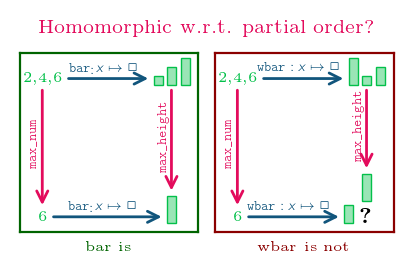

In [39]:
# must regenerate object 
boxes = {'correct':  {di: bar((b1x1 + (bw+gap)*i, b1y1), bw, di*.025) for i, di in enumerate(data)}, 
         'incorrect': {di: bar((b1x1 + (bw+gap)*i, b1y1), bw, dx*.025) for i, (di, dx) in enumerate(zip(data, np.roll(data, 1)))}}

max_boxes = {'correct':  bar((b1x1 + (bw+gap), b2y2), bw, max(data)*.025),
             'incorrect': bar((b1x1 + (bw+gap), b2y2 + 5*gap), bw, max(data)*.025)}

incorrect_map = bar((b1x1-gap, b2y2), boxes['incorrect'][max(data)].get_width(), boxes['incorrect'][max(data)].get_height())  


fig, axd = plt.subplot_mosaic([['correct', 'incorrect']], figsize=(2, 1.25), layout='compressed')

for name, ax in axd.items():
    ax.set(xticks=[], yticks=[], xlim=(0,1), ylim=(0,1), aspect='equal')
    

    xy = ax.text(x1, b1y1, f"{",".join([str(i) for i in data])}", ha='left', va='bottom', fontsize=fs['tiny'], color=pcd['section'])
    xley = ax.annotate(f"{max(data)}", xy=(0,0), xytext=(.5, b2y2), textcoords=(xy, 'data'), ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['section'])
    
    # arrows: annotate: tail, head, tail=text, xy=head
    
    f1 = ax.annotate(f"", (.475, 1), (.475,0), xycoords=(xy, xley) , textcoords= xy, arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['fiber'])) 
    ml = ax.annotate(r"$\texttt{max_num}$", xy=(0,0), xytext=(.25, .5), textcoords=f1, fontsize=fs['tiny'], color=pcd['fiber'], ha='right', va='center', rotation=90)
    

    for di in data:
        ax.add_patch(boxes[name][di])


    f1 = ax.annotate(f"", (.475, 1), (.475,0), xycoords= max_boxes[name], textcoords = boxes[name][4], arrowprops=dict(arrowstyle="->,widthA=.15, lengthA=0", color=pcd['fiber'])) 
    ml = ax.annotate(r"$\texttt{max_height}$", xy=(0,0), xytext=(.25, .5), textcoords=f1, fontsize=fs['tiny'], color=pcd['fiber'], ha='right', va='center', rotation=90)
    
    hdx = ax.add_patch(max_boxes[name])
    
    if name == 'incorrect':
        b = ax.add_patch(incorrect_map)
        hdx = b
        ax.text(b1x1+4*gap, b2y2-.02, r"$\textbf{?}$", ha='center', va='bottom', fontsize=fs['footnote'])
        
    
    for tail, head in [ (xy, (boxes[name][2], xy)), (xley, (hdx, xley), )]  :
        a = ax.annotate("", (0, .5), (1, .5), xycoords=head, textcoords=tail,  arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['artist']))
        lab = r"$\texttt{bar}_: x \mapsto \Box$" if name == 'correct' else r"$\texttt{wbar}: x \mapsto \Box$"
        ax.annotate(lab, xy=(0,0), xytext =(.5, .85), textcoords=a, ha='center', va='bottom', color=pcd['artist'],  fontsize=fs['tiny'])

axd['incorrect'].spines[:].set_color('darkred')
axd['correct'].spines[:].set_color('darkgreen')
fig.suptitle("Homomorphic w.r.t. partial order?", fontsize=fs['script'], color=pcd['fiber'])
axd['correct'].text(.5, -.05, "bar is", transform=axd['correct'].transAxes, va='top', ha='center', color='darkgreen', fontsize=fs['tiny'],)
axd['incorrect'].text(.5, -.05, "wbar is not", transform=axd['incorrect'].transAxes, va='top', ha='center', fontsize=fs['tiny'], color='darkred')

Text(0.5, -0.05, 'sbar is not')

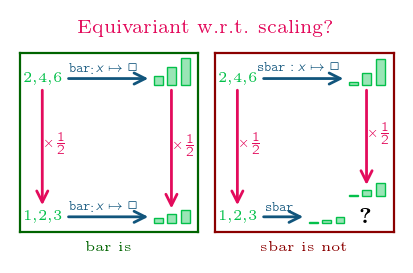

In [40]:
# must regenerate object 

b1x1 = .75

def barh_(di): 
    return di**2

sd = [di*.5 for di in data]
boxes = {'correct':  {di: bar((b1x1 + (bw+gap)*i, b1y1), bw, di*.025) for i, di in enumerate(data)}, 
         'incorrect': {di: bar((b1x1 + (bw+gap)*i, b1y1), bw, barh_(di)*.004) for i, di in enumerate(data)},
         'invariant': {di: bar((b1x1 + (bw+gap)*i, b1y1), bw, dx*.025) for i, (di, dx) in enumerate(zip(data, np.roll(data, 1)))}}


boxes_scale = {k : { di: bar((b.get_xy()[0], b2y2 + (gap*6 if k=='incorrect' else 0)), b.get_width(), b.get_height()*.5) for di, b in v.items()} for k, v in boxes.items()} 

boxes_incorrect ={di: bar((b1x1 + (bw+gap)*i-gap*9, b2y2), bw, barh_(di)*.004) for i, di in enumerate(sd)}

fig, axd = plt.subplot_mosaic([['correct', 'incorrect']], figsize=(2, 1.25), layout='compressed')

for name, ax in axd.items():
    ax.set(xticks=[], yticks=[], xlim=(0,1), ylim=(0,1), aspect='equal')
    

    xy = ax.text(x1, b1y1, f"{",".join([str(i) for i in data])}", ha='left', va='bottom', fontsize=fs['tiny'], color=pcd['section'])
    xley = ax.annotate("{:.0f},{:.0f},{:.0f}".format(*sd), xy=(0,0), xytext=(.5, b2y2), textcoords=(xy, 'data'), ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['section'])
    
    # arrows: annotate: tail, head, tail=text, xy=head
    
    f1 = ax.annotate(f"", (.475, 1), (.475,0), xycoords=(xy, xley) , textcoords= xy, arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['fiber'])) 
    ml = ax.annotate(r"$\times\frac{1}{2}$", xy=(0,0), xytext=(.75, .5), textcoords=f1, fontsize=fs['tiny'], color=pcd['fiber'], ha='left', va='center')
    

    for di in data:
        ax.add_patch(boxes[name][di])
        ax.add_patch(boxes_scale[name][di])


    f1 = ax.annotate(f"", (.475, 1), (.475,0), xycoords= boxes_scale[name][4], textcoords = boxes[name][4], arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['fiber'])) 
    ml = ax.annotate(r"$\times\frac{1}{2}$", xy=(0,0), xytext=(.75, .5), textcoords=f1, fontsize=fs['tiny'], color=pcd['fiber'], ha='left', va='center')

    
    hdx = boxes_scale[name][2]
    
    if name == 'incorrect':
        for d, b in boxes_incorrect.items():
            ax.add_patch(b)
        hdx = boxes_incorrect[1]
        ax.text(b1x1+4*gap, b2y2-.02, r"$\textbf{?}$", ha='center', va='bottom', fontsize=fs['footnote'])
    
    for i,(tail, head) in enumerate([(xy, (boxes[name][2], xy)), (xley, (hdx, xley), )]):
        a = ax.annotate("", (0, .5), (1, .5), xycoords=head, textcoords=tail,  arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['artist']))
        match name:
            case 'correct':
                lab = r"$\texttt{bar}_: x \mapsto \Box$"
            case 'invariant':
                lab = r"$\texttt{wbar}: x \mapsto \Box$"
            case 'incorrect':
                lab = r"$\texttt{sbar}: x \mapsto \Box$" if i == 0 else r"$\texttt{sbar}$"
        ax.annotate(lab, xy=(0,0), xytext =(.5, .85), textcoords=a, ha='center', va='bottom', color=pcd['artist'],  fontsize=fs['tiny'])

axd['correct'].spines[:].set_color('darkgreen')
axd['incorrect'].spines[:].set_color('darkred')
#axd['invariant'].spines[:].set_color('orange')

fig.suptitle("Equivariant w.r.t. scaling?", fontsize=fs['script'], color=pcd['fiber'])
axd['correct'].text(.5, -.05, "bar is", transform=axd['correct'].transAxes, va='top', ha='center', color='darkgreen', fontsize=fs['tiny'],)
axd['incorrect'].text(.5, -.05, "sbar is not", transform=axd['incorrect'].transAxes, va='top', ha='center', fontsize=fs['tiny'], color='darkred')
#axd['invariant'].text(.5, -.05, "wbar is", transform=axd['invariant'].transAxes, va='top', ha='center', fontsize=fs['tiny'], color='orange')


In [62]:
boxes['correct'][4].get_width()

0.05

In [70]:
boxes_scale

{'correct': {2: <matplotlib.patches.Rectangle at 0x1d13b2f65a0>,
  4: <matplotlib.patches.Rectangle at 0x1d13b2f4080>,
  6: <matplotlib.patches.Rectangle at 0x1d13b3101d0>},
 'incorrect': {2: <matplotlib.patches.Rectangle at 0x1d13b270c50>,
  4: <matplotlib.patches.Rectangle at 0x1d13b272450>,
  6: <matplotlib.patches.Rectangle at 0x1d13b272690>}}

In [34]:
plt.text?

Signature:
plt.text(
    x: 'float',
    y: 'float',
    s: 'str',
    fontdict: 'dict[str, Any] | None' = None,
    **kwargs,
) -> 'Text'
Docstring:
Add text to the Axes.

Add the text *s* to the Axes at location *x*, *y* in data coordinates.

Parameters
----------
x, y : float
    The position to place the text. By default, this is in data
    coordinates. The coordinate system can be changed using the
    *transform* parameter.

s : str
    The text.

fontdict : dict, default: None

    .. admonition:: Discouraged

       The use of *fontdict* is discouraged. Parameters should be passed as
       individual keyword arguments or using dictionary-unpacking
       ``text(..., **fontdict)``.

    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by `.rcParams`.

Returns
-------
`.Text`
    The created `.Text` instance.

Other Parameters
----------------
**kwargs : `~matplotlib.text.Text` properties.
    Other miscellaneous text pa